In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Depression Professional Dataset.csv")

In [3]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [5]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['gender', 'age', 'work_pressure', 'job_satisfaction', 'sleep_duration',
       'dietary_habits', 'have_you_ever_had_suicidal_thoughts_?', 'work_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [7]:
num_cols = df.dtypes[df.dtypes != 'object'].index.to_list()
num_cols

['age', 'work_pressure', 'job_satisfaction', 'work_hours', 'financial_stress']

In [8]:

df.isnull().sum()

gender                                   0
age                                      0
work_pressure                            0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
have_you_ever_had_suicidal_thoughts_?    0
work_hours                               0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [9]:

df['depression'].value_counts()

depression
No     1851
Yes     203
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['depression'] = encoder.fit_transform(df['depression'])

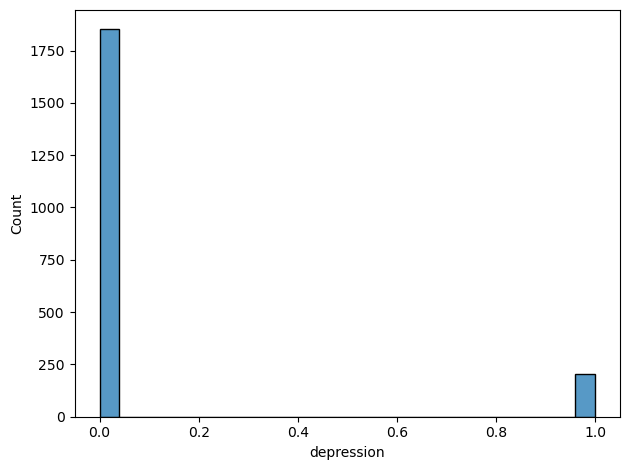

In [21]:
sns.histplot(df['depression'], bins=25)
plt.tight_layout()
plt.show()

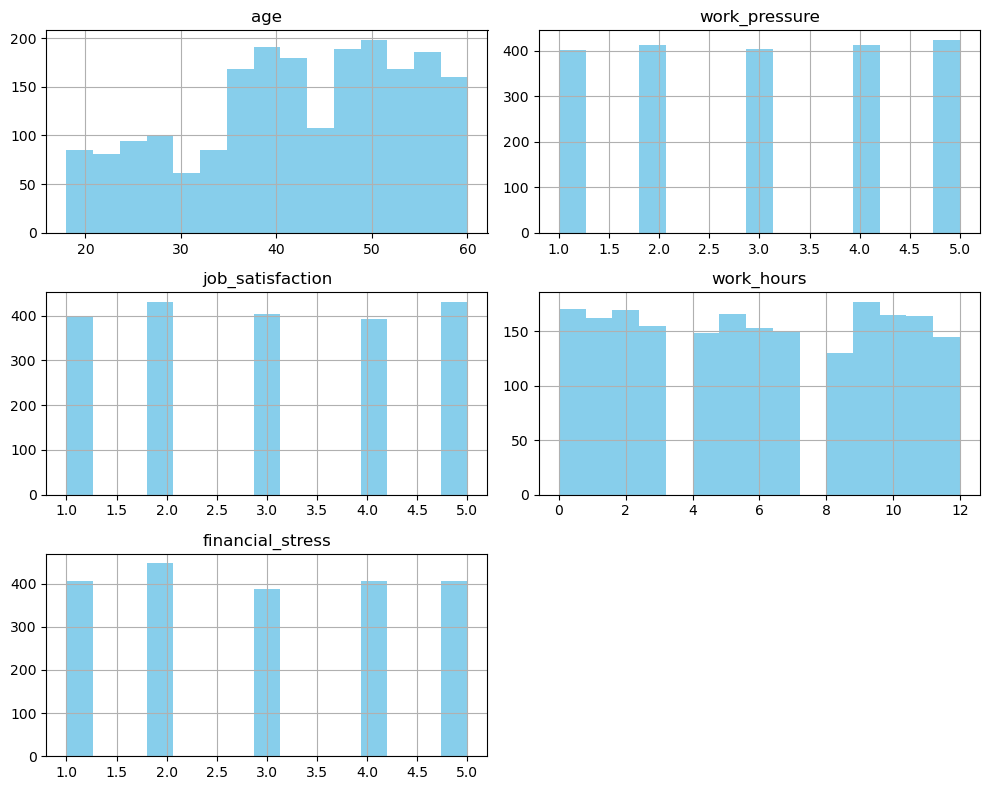

In [12]:
df[num_cols].hist(figsize=(10, 8), bins=15, color='skyblue')
plt.tight_layout()
plt.show()

In [13]:
df[num_cols].corr()

,age,work_pressure,job_satisfaction,work_hours,financial_stress
age,1.000000,-0.000472,-0.048758,-0.004399,0.019743
work_pressure,-0.000472,1.000000,-0.012764,-0.055904,0.019687
job_satisfaction,-0.048758,-0.012764,1.000000,0.007383,-0.006156
work_hours,-0.004399,-0.055904,0.007383,1.000000,-0.000186
financial_stress,0.019743,0.019687,-0.006156,-0.000186,1.000000


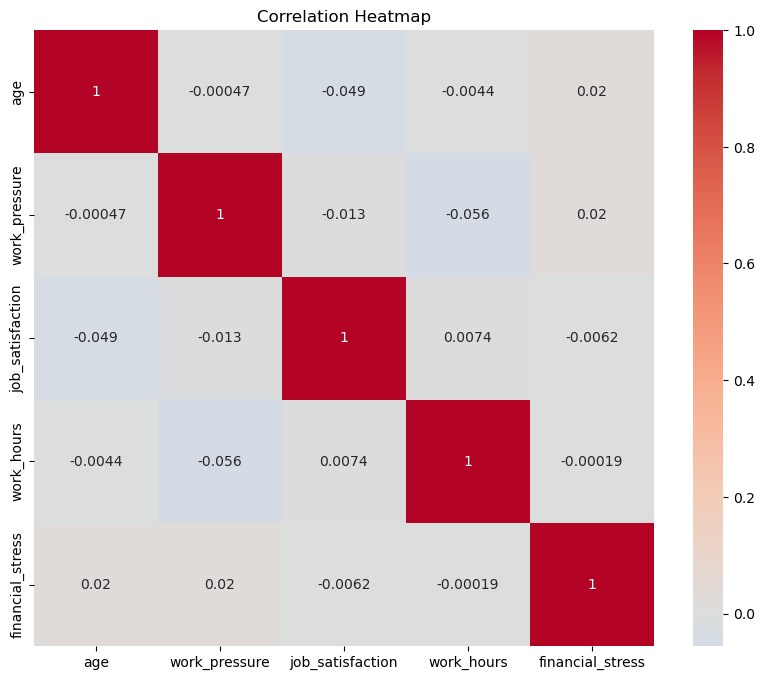

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
cat_cols = ['Gender', 'Dietary Habits', 'Family History of Mental Illness']

for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Depression', palette='viridis')
    plt.title(f'{feature} vs Depression')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Depression', labels=['No', 'Yes'])
    plt.show()

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

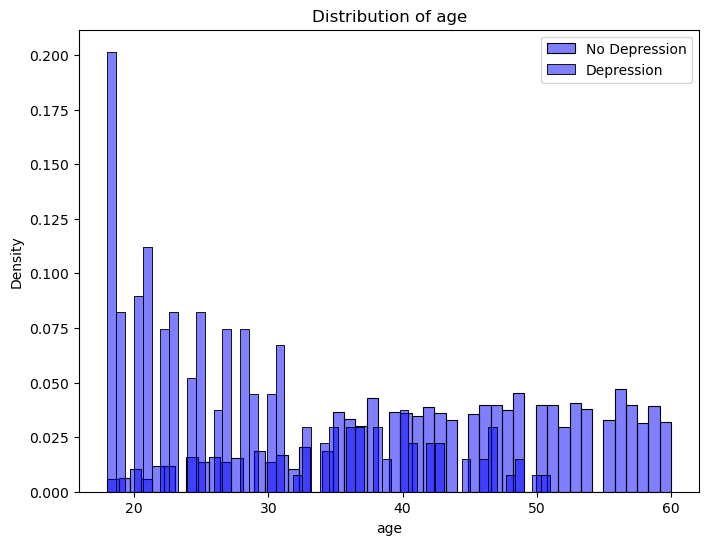

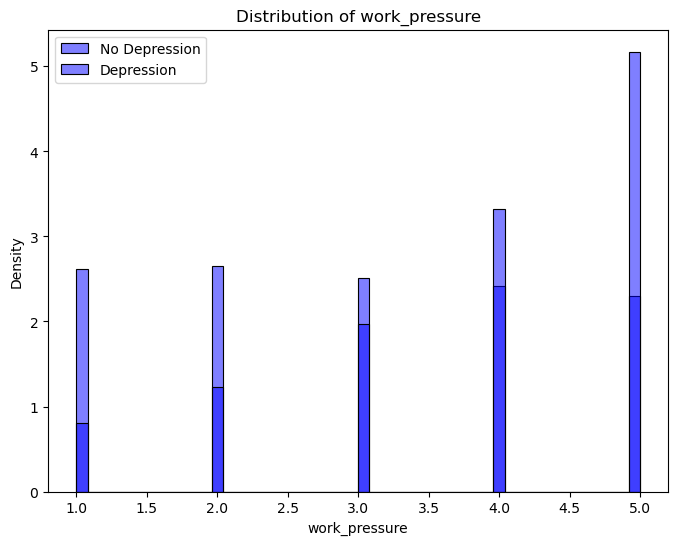

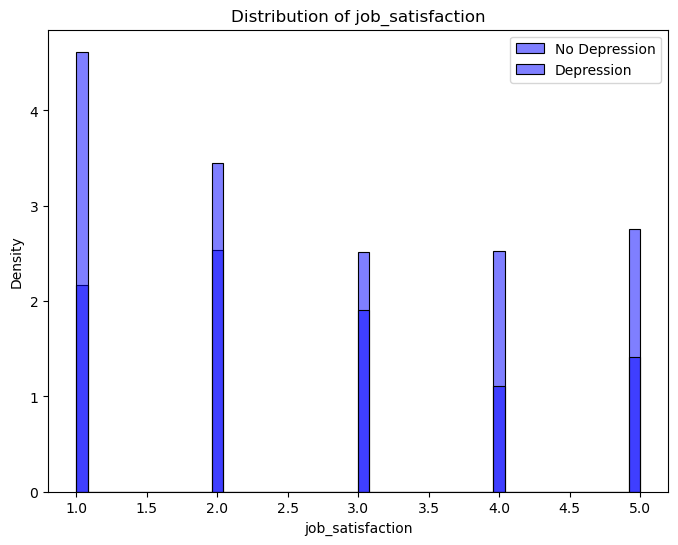

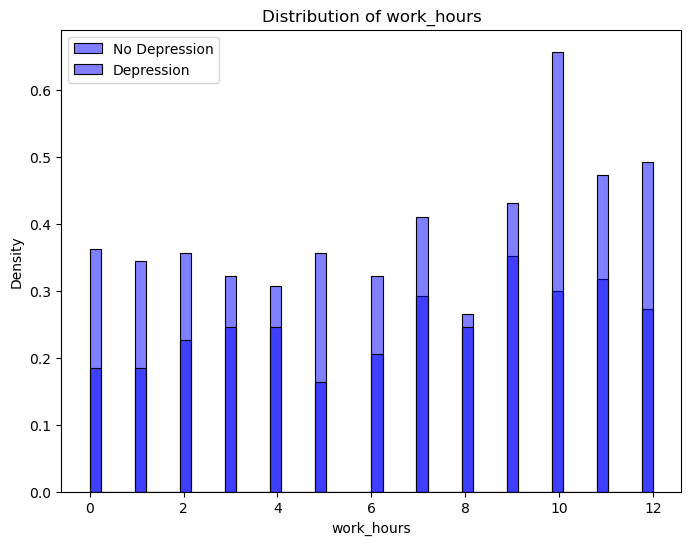

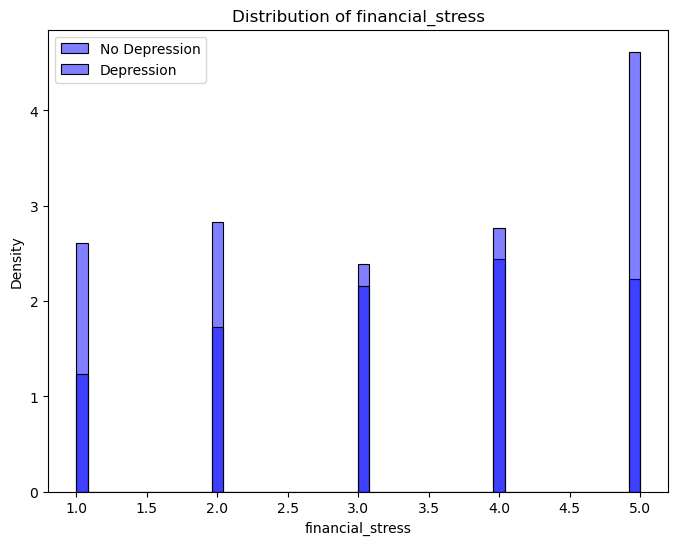

In [22]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col][df.depression == 0],
                 stat='density', bins=50,
                 color='blue', alpha=0.5,
                 label='No Depression')
    sns.histplot(df[col][df.depression == 1],
                 stat='density', bins=50,
                 color='blue', alpha=0.5,
                 label='Depression')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


In [24]:
df['depression'].nunique()

2

In [23]:
df['depression'].value_counts()

depression
0    1851
1     203
Name: count, dtype: int64